In [11]:
import pandas as pd

df = pd.read_csv('data/housing.csv')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [12]:
df.shape

(20640, 10)

In [13]:
# Create the training DataFrame
train_df = df.sample(frac=0.8, random_state=42)
train_df = train_df.reset_index(drop=True)

# Create the testing DataFrame
test_df = df.drop(train_df.index)
test_df = test_df.reset_index(drop=True)

In [14]:
# get observed outputs for train and test

y_train = train_df['median_house_value'].to_numpy()
y_test = test_df['median_house_value'].to_numpy()

y_train.shape, y_test.shape

((16512,), (4128,))

In [15]:
from sklearn.metrics import mean_absolute_error

#get the mean house value to compare with the test dataset





In [16]:
# get the mean absolute error
# baseline_model_test_predictions = [average_median_house_value] * len(test_df)




# Q1
Make heatmap of the main correlations using all the data in 'train_df' and also 'total_rooms' , 'total_bedrooms' 'households'.

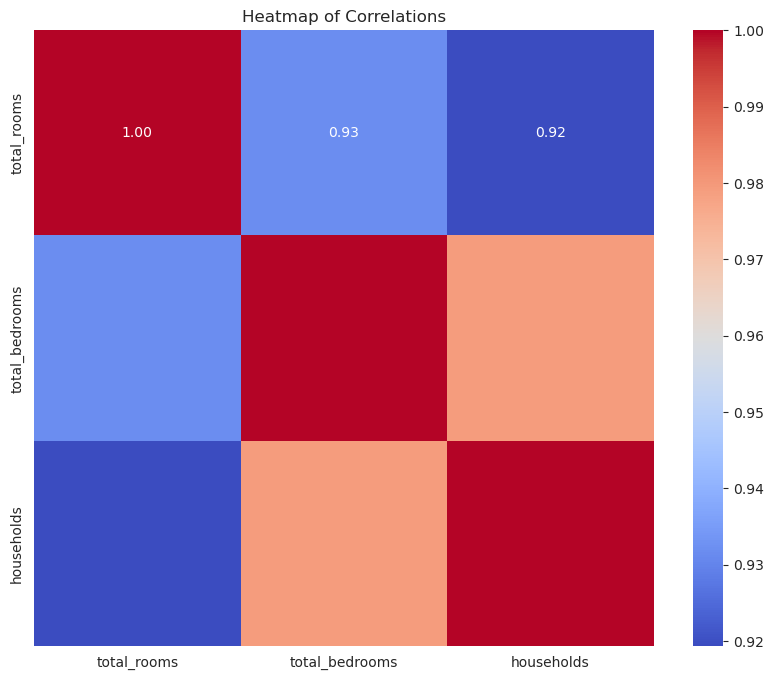

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(train_df[['total_rooms', 'total_bedrooms', 'households']])
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))         
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()


In [18]:
# Get X_train_3 which has total_rooms, total_bedrooms, and households as inputs

import numpy as np

X_train_3 = train_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()

X_train_3.shape


(16512, 3)

In [19]:
# Get X_test_3 which has total_rooms, total_bedrooms, and households as inputs

X_test_3 = test_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()

X_test_3.shape


(4128, 3)

In [20]:
from sklearn.ensemble import RandomForestRegressor

forest_base = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_3, y_train)
forest_base_test_predictions = forest_base.predict(X_test_3)
mean_absolute_error(y_test, forest_base_test_predictions)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values